In [33]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
%matplotlib inline
fig_dir = "/Users/crankshaw/model-serving/clipper_paper/ModelServingPaper/nsdi_2017/fake-figs"

log_loc = os.path.abspath("../faster_caching_feedback/")

results_files = []
for name in os.listdir(log_loc):
    if "results" in name:
        results_files.append(name)

exp_names = [f.split("_results")[0] for f in results_files]
print exp_names

['caching_off_window_100_160907-115933', 'caching_off_window_1_160907-115352', 'caching_off_window_20_160907-115644', 'caching_on_window_100_160907-120100', 'caching_on_window_1_160907-115518', 'caching_on_window_20_160907-115808']


In [34]:
def get_results(fname):
    res_fname = fname + "_results.json"
    conf_fname = fname + "_config.json"
    with open(os.path.join(log_loc, res_fname), "r") as rf, open(os.path.join(log_loc, conf_fname), "r") as cf:
        results = json.load(rf)
        conf = json.load(cf)
        cache_off = conf["clipper_conf"]["salt_cache"]
        window_size = conf["clipper_conf"]["window_size"]
        update_cache_rate = [rc["ratio"] for rc in results["ratio_counters"] if rc["name"] == "update_cache_hits"][0]
        update_thruput = [m["rate"] for m in results["meters"] if m["name"] == "update_thruput"][0]
    return (cache_off, window_size, update_cache_rate, update_thruput)
#         print results
#         print ""
#         print conf

extracted_results = [get_results(e) for e in exp_names]        
#         print results
#         goodput = [t["rate"] for t in results["meters"] if t["name"] == "logistic_reg:cache_included_thruput"][0]
#         print goodput
#         hit_rate = [h["ratio"] for h in results["ratio_counters"] if h["name"] == "cache_hits"][0]
#         thruput = [h["rate"] for h in results["meters"] if h["name"] == "spark_svm:cache_included_thruput"][0]
#     return (num_reps, goodput)
# (reps, goodputs) = zip(*[get_results(fname) for fname in results_files])

In [35]:
print extracted_results

[(True, 100, 0.0, 60.30238345468424), (True, 1, 0.0, 2545.9428345919364), (True, 20, 0.0, 297.2384845502278), (False, 100, 0.9986640898644615, 678.2967669000858), (False, 1, 0.6490521851373778, 3252.353801960164), (False, 20, 0.7393777042585673, 504.9567720631678)]


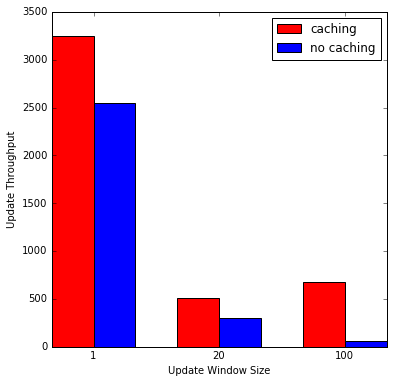

In [36]:
def reorder(c):
    unzipped = zip(*c)
    merged = zip(unzipped[1], unzipped[3])
    merged.sort()
    return merged
caching_off = reorder(extracted_results[:3])
caching_on = reorder(extracted_results[3:])

windows, cache_off_thrus = zip(*caching_off)
cache_on_thrus = zip(*caching_on)[1]



fig, ax = plt.subplots(figsize=(6,6))
width = 1
ax.bar(np.arange(len(cache_off_thrus))*width*3,  cache_on_thrus, width=width, color="red", label="caching")
ax.bar(np.arange(len(cache_off_thrus))*width*3 + 1,  cache_off_thrus, width=width, color="blue", label="no caching")




# thrus = [(m["name"].split(":")[0], m["rate"]) for m in aimd_results["meters"] if "model_thruput" in m["name"]]
# names, rates = zip(*thrus)
# ax.bar(np.arange(len(rates))*width*4 + width,  rates, width=width, color="red", label="aimd")
# ax.bar(np.arange(len(rates))*width*4 + width*2,  np.ones(len(rates))*1000, width=width, color="green", label="NO BATCHING PLACEHOLDER")

plt.xticks(np.arange(len(cache_off_thrus))*width*3 + 1, windows)
# ax.set_ylim(0, 11000)
ax.legend(loc=0)
ax.set_xlabel("Update Window Size")
ax.set_ylabel("Update Throughput")
# plt.show()
# ax.set_title("Throughput")
plt.savefig("%s/caching_for_feedback_thruput.pdf" % (fig_dir), bbox_inches='tight')

In [18]:
print caching_off

[(1, 1650.209261221375), (20, 285.56007714837756), (100, 60.23191936775616)]
